Training ARIMA model...
ARIMA MAPE: inf%
Training SARIMA model...
SARIMA MAPE: inf%
Models saved successfully.
Forecast results saved to 'forecast_results.csv'.


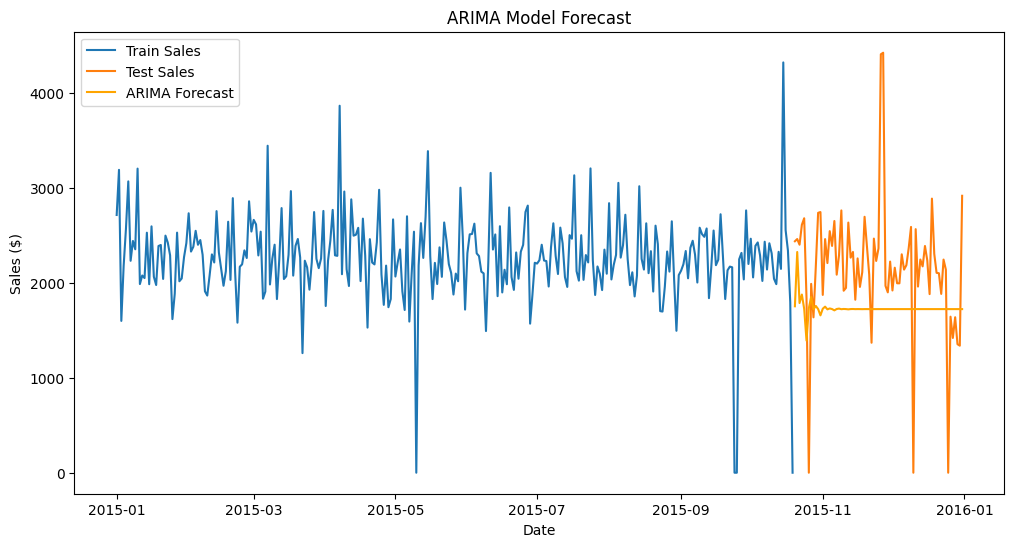

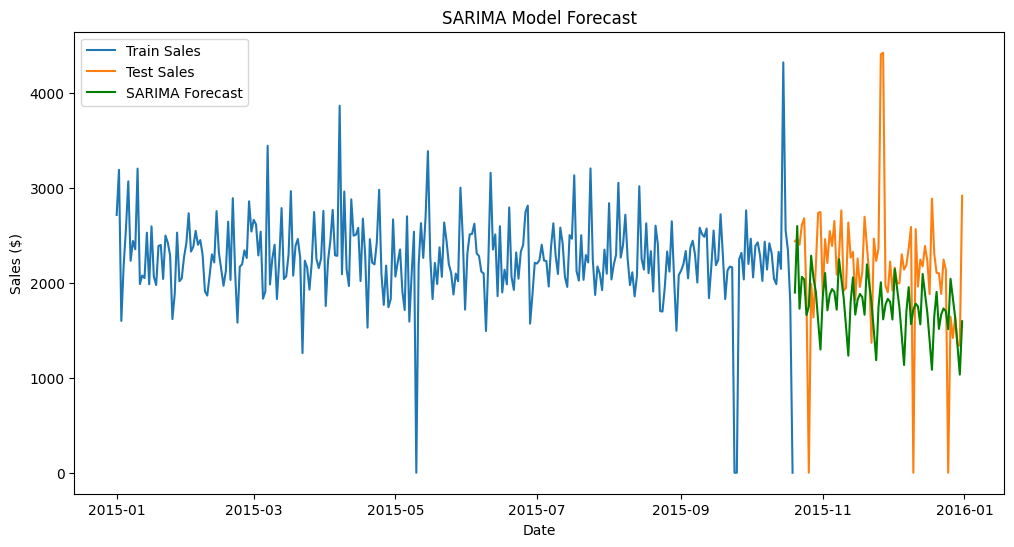

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib

# Load your feature-engineered sales data
data = pd.read_csv(r"C:\Users\sonur\OneDrive\Desktop\Projects\Donimos\pizza_sales_with_features.csv")

# Convert the order_date column to datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Set order_date as the index
data.set_index('order_date', inplace=True)

# Group by date and sum total_price to get daily sales
daily_sales = data.resample('D')['total_price'].sum()

# Split the data into train and test sets
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales.iloc[:train_size], daily_sales.iloc[train_size:]

# Model Training

# ARIMA Model
print("Training ARIMA model...")
arima_model = ARIMA(train, order=(5, 1, 0))  # Adjust (p, d, q) as needed
arima_fit = arima_model.fit()

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(test))

# Evaluate ARIMA model performance using MAPE
arima_mape = np.mean(np.abs((test - arima_forecast) / test)) * 100
print(f'ARIMA MAPE: {arima_mape:.2f}%')

# SARIMA Model
print("Training SARIMA model...")
sarima_model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))  # Example seasonal order
sarima_fit = sarima_model.fit()

# Forecasting with SARIMA
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Evaluate SARIMA model performance using MAPE
sarima_mape = np.mean(np.abs((test - sarima_forecast) / test)) * 100
print(f'SARIMA MAPE: {sarima_mape:.2f}%')

# Save the models
joblib.dump(arima_fit, 'arima_model.pkl')
joblib.dump(sarima_fit, 'sarima_model.pkl')
print("Models saved successfully.")

# Create a DataFrame to save forecasts and actual values
results = pd.DataFrame({
    'Actual': test,
    'ARIMA Forecast': arima_forecast,
    'SARIMA Forecast': sarima_forecast
})

# Save the results to a CSV file
results.to_csv('forecast_results.csv')
print("Forecast results saved to 'forecast_results.csv'.")

# Plot the results for ARIMA
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Sales')
plt.plot(test.index, test, label='Test Sales')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

# Plot the results for SARIMA
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Sales')
plt.plot(test.index, test, label='Test Sales')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()
